## 線性迴歸

請先定義一個一元一次函數 $f(x) = ax+b$ ($a, b$請自己決定 盡量找一個會經過第一象限的函數)

並在(0, 10)中平均取100個數字當作輸入資料 $X$

可以藉由帶入 $X$ 到 $f$ 裡得到輸出資料 $Y$

把$Y$加入一些雜訊 當作要做線性回歸的原始資料$\widehat {Y}$

(雜訊盡量取大一點)

對$X$和$\widehat {Y}$做線性迴歸

線性迴歸公式:

M = np.matrix([X, np.ones(100)]).T

sol = ((M.T \* M) \*\* (-1) \* M.T\*matrix(Y_hat).T)

以上兩行可直接複製使用

sol[0, 0], sol[1, 0] 分別是回歸得到的$\widehat {a}$和$\widehat {b}$

最後請分別用不同顏色畫出原始的  $f(x) = ax+b$ , 回歸得到的  $\widehat {f}(x) = \widehat {a}x+\widehat {b}$

以及畫出原始資料點$X, \widehat {Y}$

### 範例圖片

![範例圖片](image.png)

### Hint:
* 要加入雜訊可以用numpy.random 裡面的函數
* 平均取輸入資料、加入雜訊以及畫圖可以參考影片「0310 Array 畫圖超方便」

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 定義自己的f(x) = a*x+b
def f(x):
    return 3 * x + 4

In [3]:
# 取入資料 X
X = np.linspace(0, 10, 100)
X

array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
         0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
         0.80808081,   0.90909091,   1.01010101,   1.11111111,
         1.21212121,   1.31313131,   1.41414141,   1.51515152,
         1.61616162,   1.71717172,   1.81818182,   1.91919192,
         2.02020202,   2.12121212,   2.22222222,   2.32323232,
         2.42424242,   2.52525253,   2.62626263,   2.72727273,
         2.82828283,   2.92929293,   3.03030303,   3.13131313,
         3.23232323,   3.33333333,   3.43434343,   3.53535354,
         3.63636364,   3.73737374,   3.83838384,   3.93939394,
         4.04040404,   4.14141414,   4.24242424,   4.34343434,
         4.44444444,   4.54545455,   4.64646465,   4.74747475,
         4.84848485,   4.94949495,   5.05050505,   5.15151515,
         5.25252525,   5.35353535,   5.45454545,   5.55555556,
         5.65656566,   5.75757576,   5.85858586,   5.95959596,
         6.06060606,   6.16161616,   6.26262626,   6.36

In [4]:
# 得到輸入資料 Y
Y = f(X)
Y

array([  4.        ,   4.3030303 ,   4.60606061,   4.90909091,
         5.21212121,   5.51515152,   5.81818182,   6.12121212,
         6.42424242,   6.72727273,   7.03030303,   7.33333333,
         7.63636364,   7.93939394,   8.24242424,   8.54545455,
         8.84848485,   9.15151515,   9.45454545,   9.75757576,
        10.06060606,  10.36363636,  10.66666667,  10.96969697,
        11.27272727,  11.57575758,  11.87878788,  12.18181818,
        12.48484848,  12.78787879,  13.09090909,  13.39393939,
        13.6969697 ,  14.        ,  14.3030303 ,  14.60606061,
        14.90909091,  15.21212121,  15.51515152,  15.81818182,
        16.12121212,  16.42424242,  16.72727273,  17.03030303,
        17.33333333,  17.63636364,  17.93939394,  18.24242424,
        18.54545455,  18.84848485,  19.15151515,  19.45454545,
        19.75757576,  20.06060606,  20.36363636,  20.66666667,
        20.96969697,  21.27272727,  21.57575758,  21.87878788,
        22.18181818,  22.48484848,  22.78787879,  23.09

In [5]:
# 加入雜訊得到 Y_hat
Y_hat = Y + np.random.randn(100)*5 + 1
Y_hat

array([ -1.76391403,   4.34719682,  12.26575863,  -0.2558827 ,
        -0.80566713,  13.30033752,   2.01079549,   8.71333394,
         6.32943677,   7.53978488,  10.93076374,  -1.88433984,
        10.09704952,   8.6367987 ,  13.31964928,  11.01337162,
         0.51415839,  11.27748027,   6.89753248,  12.52163161,
        12.68139129,   6.12901064,   9.71629496,   7.98944563,
        10.13441805,  16.2594842 ,  10.12741199,  14.49964709,
        14.43062227,  11.92961932,   7.27904933,  11.79883534,
        12.36430748,   9.75908275,  14.30525886,  19.77792405,
        30.83048303,   9.20773917,  20.21533882,  16.82855358,
        11.14596607,  19.18972458,  25.24275641,  16.7191697 ,
        13.96776543,  19.15672993,  26.97715844,  27.24271382,
        17.24838759,  18.85493492,  20.73800181,  16.65949382,
        19.94922893,  20.91555329,  18.27221596,  14.59391561,
        13.1677565 ,  28.9921582 ,  34.62397773,  27.13843907,
        14.93226049,  30.82679378,  18.486148  ,  26.44

In [6]:
# 做線性回歸
M = np.matrix([X, np.ones(100)]).T
sol = ((M.T * M) ** (-1) * M.T*np.matrix(Y_hat).T)

In [7]:
# 原本設a = 3, 看看回歸做出來的是多少
a_hat = sol[0, 0]
a_hat

3.1000482879037254

In [8]:
# 原本設b = 4, 看看回歸做出來的是多少
b_hat = sol[1, 0]
b_hat

3.9239384332759402

In [9]:
# 這是我們得到的回歸方程式
def f_hat(x):
    return a_hat * x + b_hat

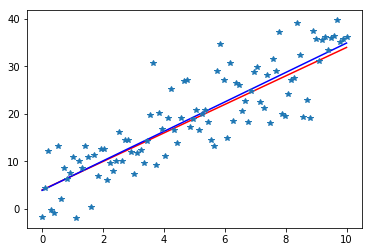

In [10]:
# 最後畫圖

plt.plot(X, f(X), 'r')           # 原始的 f(x) = a*x + b
plt.plot(X, f_hat(X), 'b')       # 回歸得到的 f_hat(x) = a_hat*x + b_hat
plt.plot(X, Y_hat, '*')          # 原始資料